In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from datetime import datetime
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 70) #view 70 columns

<hr style="border:1px solid gray"> </hr>

## EDA
- Create visualizations to understand dataset
    - understand the distribution of different columns
    - check for multicollinearity
- Check that the dataset meets the assumptions (for regression)
[//]: # "- Check the balance of the different classes (for classification task)"
[//]: # "- Check that the dataset meets the assumptions (for regression task)"

#### Load clean data

In [33]:
df = pd.read_csv('data/clean_data.csv').iloc[:, 1:]

In [34]:
df.head()

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,lat_long,quadrant,nrth_sth,age,month,yr_quarter
0,2014-10-13,7129300520,221900.0,3,1.00,1180,5650,0.0,0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,0,0,three,half_two,average,"(47.5112, -122.257)",NW,N,66,10,4
1,2014-12-09,6414100192,538000.0,3,2.25,2570,7242,0.0,0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,1,1,three,two_two_point_five,average,"(47.721000000000004, -122.319)",NW,N,70,12,4
2,2015-02-25,5631500400,180000.0,2,1.00,770,10000,0.0,0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,0,one_two,half_two,below_average,"(47.7379, -122.23299999999999)",NW,N,88,2,1
3,2014-12-09,2487200875,604000.0,4,3.00,1960,5000,0.0,0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,1,0,four,many,average,"(47.5208, -122.39299999999999)",NW,N,56,12,4
4,2015-02-18,1954400510,510000.0,3,2.00,1680,8080,0.0,0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,three,half_two,good,"(47.6168, -122.045)",NE,N,34,2,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21417 non-null  object 
 1   id             21417 non-null  int64  
 2   price          21417 non-null  float64
 3   bedrooms       21417 non-null  int64  
 4   bathrooms      21417 non-null  float64
 5   sqft_living    21417 non-null  int64  
 6   sqft_lot       21417 non-null  int64  
 7   waterfront     21417 non-null  float64
 8   view           21417 non-null  int64  
 9   condition      21417 non-null  int64  
 10  grade          21417 non-null  int64  
 11  sqft_above     21417 non-null  int64  
 12  zipcode        21417 non-null  int64  
 13  lat            21417 non-null  float64
 14  long           21417 non-null  float64
 15  sqft_living15  21417 non-null  int64  
 16  sqft_lot15     21417 non-null  int64  
 17  renovated      21417 non-null  int64  
 18  baseme

#### Explore target variable (price)
Non-normality in price may hurt correlations with the features so addressing outliers may help, which will hurt assumption checks (like linearity and homoscedasticity) later.

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
325000.0    146
400000.0    144
Name: price, dtype: int64

<AxesSubplot:>

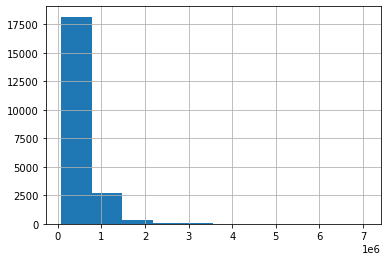

In [36]:
display(df['price'].value_counts().head(7))
df['price'].hist()

<AxesSubplot:xlabel='price'>

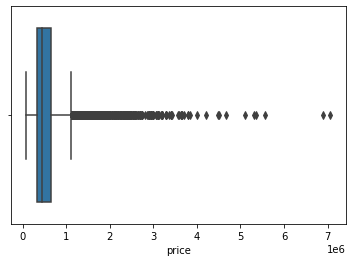

In [37]:
sns.boxplot(x = df['price'])

In [38]:
#Finding a cutoff point
for i in range(85, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.85 percentile: 780000.0
0.86 percentile: 799803.9999999993
0.87 percentile: 815000.0
0.88 percentile: 838448.000000001
0.89 percentile: 860000.0
0.9 percentile: 889000.0
0.91 percentile: 920000.0
0.92 percentile: 950696.9600000011
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1968400.0000000014


In [39]:
len(df[df['price'] > 8e5])

2930

In [40]:
df_no_y_outlrs = df[df['price'] < 8e5]
df_no_y_outlrs['price'].max()

799990.0

<AxesSubplot:>

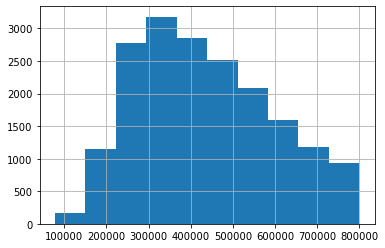

In [41]:
df_no_y_outlrs['price'].hist()

<AxesSubplot:xlabel='price'>

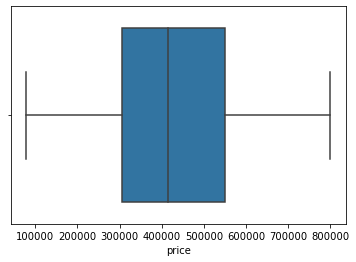

In [42]:
sns.boxplot(x = df_no_y_outlrs['price'])

#### Create sectors

In [43]:
# plt.figure(figsize = (10,10))
# sns.scatterplot(x='long',y='lat',hue='price',data=df_no_y_outlrs)
# plt.title('Lat vs Long, Price with Color');

Done in the data cleaning section. Used above chart to determine sections

#### Fix features to help with feature selection

In [44]:
# df_no_y_outlrs['sqft_living15'].hist()

In [45]:
# sns.boxplot(x = df_no_y_outlrs['sqft_living15'])

In [46]:
# df_no_y_outlrs = df_no_y_outlrs[df_no_y_outlrs['sqft_living15'] < 4000]

In [47]:
# df_no_y_outlrs

#### Split continuous and categorical variables

In [48]:
def cats_and_conts(df):
    conts = []
    cats = []
    for col in df.columns:
        if df[col].nunique() < 20:
            cats.append(col)
        else:
            conts.append(col)
    return df[cats], df[conts]
df_cats, df_conts = cats_and_conts(df_no_y_outlrs)
print('DF with sqft (cats/conts):\n', df_cats.columns, '\n', df_conts.columns)

DF with sqft (cats/conts):
 Index(['bedrooms', 'waterfront', 'view', 'condition', 'grade', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'quadrant', 'nrth_sth', 'month', 'yr_quarter'],
      dtype='object') 
 Index(['date', 'id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'lat_long', 'age'],
      dtype='object')


In [49]:
# pd.plotting.scatter_matrix(df_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Transform continuous variables and load into new dataframe

In [50]:
df_no_y_outlrs.columns

Index(['date', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'lat_long', 'quadrant', 'nrth_sth', 'age', 'month', 'yr_quarter'],
      dtype='object')

In [51]:
df_log = df_no_y_outlrs[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','grade','sqft_living15','age', 'sqft_above', 'sqft_lot15']].copy()
df_log.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_living15,age,sqft_above,sqft_lot15
0,221900.0,3,1.00,1180,5650,7,1340,66,1180,5650
1,538000.0,3,2.25,2570,7242,7,1690,70,2170,7639
2,180000.0,2,1.00,770,10000,6,2720,88,770,8062


In [52]:
for col in df_log.columns:
    df_log[col] = df_log[col].map(lambda x: np.log(x))
    df_log.rename(columns = {col: 'log_'+col}, inplace=True)
df_log.head(3)

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_grade,log_sqft_living15,log_age,log_sqft_above,log_sqft_lot15
0,12.309982,1.098612,0.00000,7.073270,8.639411,1.945910,7.200425,4.189655,7.073270,8.639411
1,13.195614,1.098612,0.81093,7.851661,8.887653,1.945910,7.432484,4.248495,7.682482,8.941022
2,12.100712,0.693147,0.00000,6.646391,9.210340,1.791759,7.908387,4.477337,6.646391,8.994917


In [53]:
print(df_log.columns)
print(df_cats.columns)

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'log_grade', 'log_sqft_living15', 'log_age',
       'log_sqft_above', 'log_sqft_lot15'],
      dtype='object')
Index(['bedrooms', 'waterfront', 'view', 'condition', 'grade', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'quadrant', 'nrth_sth', 'month', 'yr_quarter'],
      dtype='object')


In [54]:
df_log_w_cat = pd.concat([df_log,
                df_no_y_outlrs[['waterfront', 'view', 'condition', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'month', 'quadrant', 'nrth_sth', 'yr_quarter']]], axis=1)

#### Check heatmap for multicollinearity and strong correlations b/w price and the features

Index(['date', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'lat_long', 'quadrant', 'nrth_sth', 'age', 'month', 'yr_quarter'],
      dtype='object')


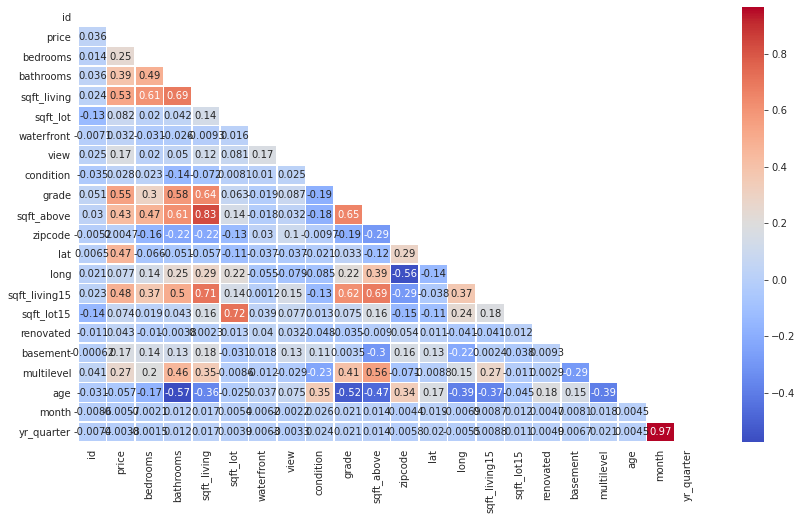

In [55]:
mask = np.zeros_like(df_no_y_outlrs.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_no_y_outlrs.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True)
print(df_no_y_outlrs.columns)

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'log_grade', 'log_sqft_living15', 'log_age',
       'log_sqft_above', 'log_sqft_lot15', 'waterfront', 'view', 'condition',
       'renovated', 'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin',
       'grade_bin', 'month', 'quadrant', 'nrth_sth', 'yr_quarter'],
      dtype='object')


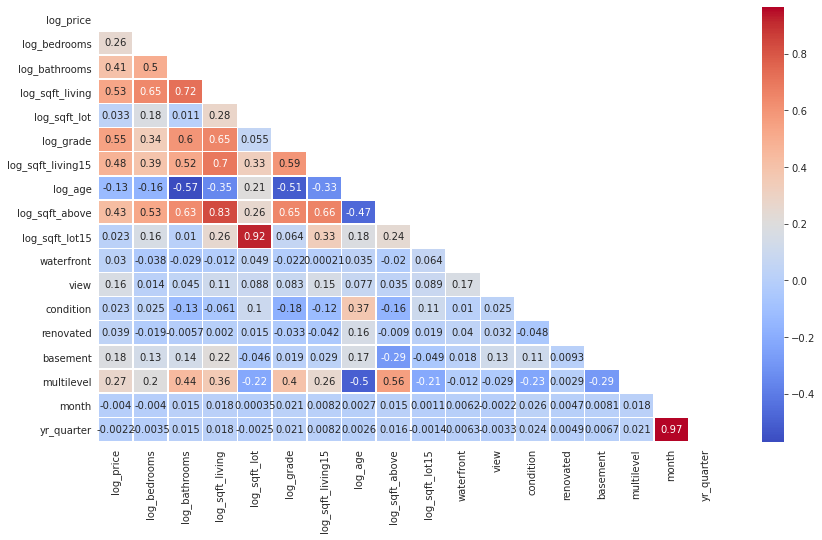

In [56]:
mask = np.zeros_like(df_log_w_cat.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_log_w_cat.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True)
print(df_log_w_cat.columns)

- strong candidates: 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin'

       
- strong log candidates: 'log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 
    'grade_bin', 'age'


In [57]:
df_strong = df_no_y_outlrs[['price','bedrooms', 'bathrooms', 'sqft_living',
            'grade', 'sqft_living15', 'sqft_above', 'view','multilevel', 'basement', 'bedrooms_bin',
            'bathrooms_bin','quadrant','nrth_sth','grade_bin']]
df_log_strong = df_log_w_cat[['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'log_sqft_above','view','multilevel','nrth_sth','basement',  
    'bedrooms_bin','bathrooms_bin','grade_bin', 'quadrant']]

Show scatter matrix to see weak and strong candidates

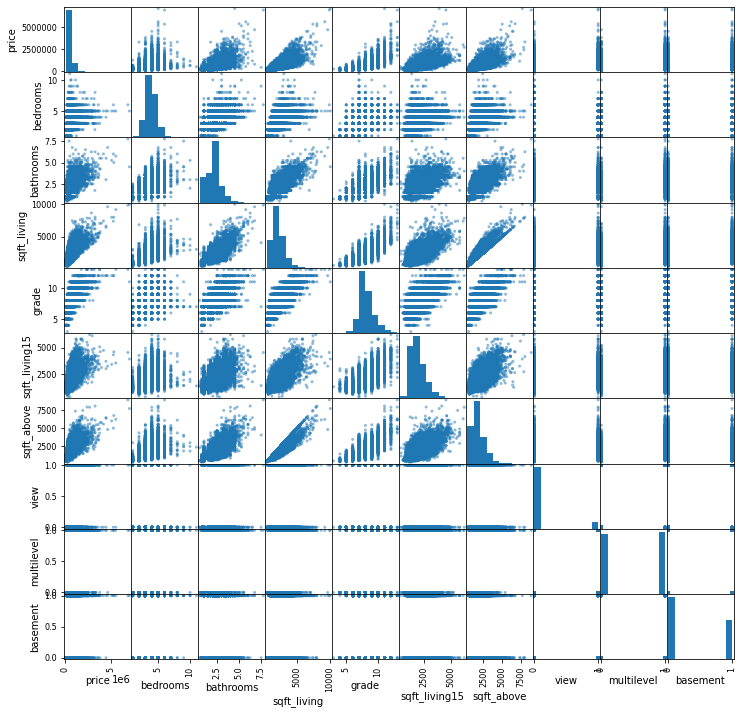

In [28]:
pd.plotting.scatter_matrix(df_strong, figsize=(12,12),
                           diagonal='hist'); # diagonal='kde' to view kde

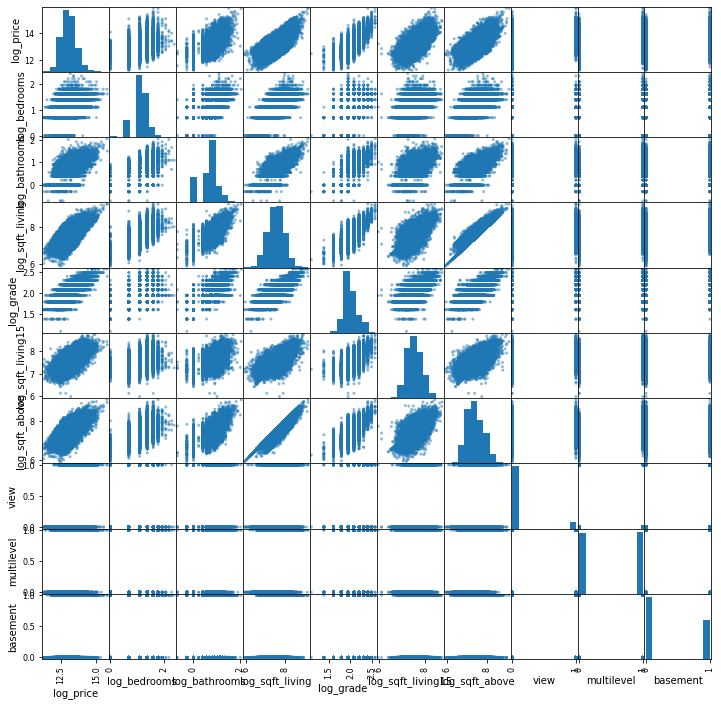

In [29]:
pd.plotting.scatter_matrix(df_log_strong, figsize=(12,12),
                           diagonal='hist'); # diagonal='kde' to view kde

Notes on the graphs above:
- Histograms (of features):
    - again, normality not required but worth keeping an eye on
    - grade looks about normally distributed
    - bedrooms and sqft_living are right skewed
    - transforming/scaling these may help later 
- Scatterplots:
    - show heteroscedasticity, but can be fixed with transformations
- recall sqft_living has multicollinearity with grade and bedrooms

## Simple Linear Regression Models with Continuous Variables

In [58]:
from statsmodels.formula.api import ols

In [59]:
for col in ['bedrooms', 'bathrooms', 'sqft_living',
            'grade', 'sqft_living15', 'sqft_above',]:
    f = 'price' + '~' + col
    print(col.upper())
    slr_model = ols(formula= f, data=df_strong).fit()
    display(slr_model.summary())

BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1220.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          7.54e-259
Time:                        21:34:54   Log-Likelihood:            -2.4644e+05
No. Observations:               18430   AIC:                         4.929e+05
Df Residuals:                   18428   BIC:                         4.929e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.838e+05   4465.329     63.566      0.000    2.75e+05    2.93e+05
bedrooms    4.602e+04   1317.525     34.927      0.000    4.34e+04    4.86e+04
==============================================================================
Omnibus:                     1443.050   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.009
Skew:                           0.350   Prob(JB):                    1.14e-169
Kurtosis:                       2.277   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3308.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:            -2.4551e+05
No. Observations:               18430   AIC:                         4.910e+05
Df Residuals:                   18428   BIC:                         4.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.508e+05   3375.358     74.306      0.000    2.44e+05    2.57e+05
bathrooms   9.227e+04   1604.169     57.517      0.000    8.91e+04    9.54e+04
==============================================================================
Omnibus:                     1091.161   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              763.837
Skew:                           0.391   Prob(JB):                    1.36e-166
Kurtosis:                       2.382   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SQFT_LIVING


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     7175.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:            -2.4400e+05
No. Observations:               18430   AIC:                         4.880e+05
Df Residuals:                   18428   BIC:                         4.880e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.036e+05   2905.562     70.063      0.000    1.98e+05    2.09e+05
sqft_living   123.2851      1.455     84.708      0.000     120.432     126.138
==============================================================================
Omnibus:                      871.489   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.384
Skew:                           0.348   Prob(JB):                    2.61e-136
Kurtosis:                       2.427   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7907.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:            -2.4374e+05
No. Observations:               18430   AIC:                         4.875e+05
Df Residuals:                   18428   BIC:                         4.875e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.667e+05   7948.537    -33.555      0.000   -2.82e+05   -2.51e+05
grade       9.478e+04   1065.939     88.921      0.000    9.27e+04    9.69e+04
==============================================================================
Omnibus:                      559.831   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.184
Skew:                           0.398   Prob(JB):                    8.38e-123
Kurtosis:                       2.686   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SQFT_LIVING15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     5622.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:            -2.4458e+05
No. Observations:               18430   AIC:                         4.892e+05
Df Residuals:                   18428   BIC:                         4.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.726e+05   3643.608     47.378      0.000    1.65e+05     1.8e+05
sqft_living15   141.6226      1.889     74.980      0.000     137.920     145.325
==============================================================================
Omnibus:                      667.333   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.484
Skew:                           0.380   Prob(JB):                    1.34e-129
Kurtosis:                       2.559   Cond. No.                     6.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SQFT_ABOVE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     4292.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:54   Log-Likelihood:            -2.4510e+05
No. Observations:               18430   AIC:                         4.902e+05
Df Residuals:                   18428   BIC:                         4.902e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.603e+05   2864.818     90.872      0.000    2.55e+05    2.66e+05
sqft_above   107.3212      1.638     65.513      0.000     104.110     110.532
==============================================================================
Omnibus:                     1116.394   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.980
Skew:                           0.375   Prob(JB):                    4.61e-162
Kurtosis:                       2.365   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# log transformed variables
for col in ['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 
    'log_grade', 'log_sqft_living15', 'log_sqft_above']:
    f = 'log_price' + '~' + col
    print(col.upper())
    slr_model2 = ols(formula= f, data=df_log_strong).fit()
    display(slr_model2.summary())

LOG_BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1284.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          5.58e-272
Time:                        21:34:55   Log-Likelihood:                -8307.3
No. Observations:               18430   AIC:                         1.662e+04
Df Residuals:                   18428   BIC:                         1.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.4976      0.012   1057.117      0.000      12.474      12.521
log_bedrooms     0.3581      0.010     35.839      0.000       0.338       0.378
==============================================================================
Omnibus:                      560.114   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              489.842
Skew:                          -0.339   Prob(JB):                    4.29e-107
Kurtosis:                       2.576   Cond. No.                         8.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG_BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3689.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -7246.8
No. Observations:               18430   AIC:                         1.450e+04
Df Residuals:                   18428   BIC:                         1.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.6438      0.005   2475.723      0.000      12.634      12.654
log_bathrooms     0.4258      0.007     60.735      0.000       0.412       0.440
==============================================================================
Omnibus:                      462.866   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.723
Skew:                          -0.214   Prob(JB):                     1.38e-70
Kurtosis:                       2.514   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG_SQFT_LIVING


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     7254.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -5869.6
No. Observations:               18430   AIC:                         1.174e+04
Df Residuals:                   18428   BIC:                         1.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.7655      0.049    179.935      0.000       8.670       8.861
log_sqft_living     0.5549      0.007     85.169      0.000       0.542       0.568
==============================================================================
Omnibus:                      517.976   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.125
Skew:                          -0.209   Prob(JB):                     2.29e-74
Kurtosis:                       2.483   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG_GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7918.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -5634.4
No. Observations:               18430   AIC:                         1.127e+04
Df Residuals:                   18428   BIC:                         1.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4988      0.038    247.343      0.000       9.424       9.574
log_grade      1.7108      0.019     88.982      0.000       1.673       1.748
==============================================================================
Omnibus:                      141.340   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.004
Skew:                          -0.182   Prob(JB):                     4.83e-30
Kurtosis:                       2.793   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG_SQFT_LIVING15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     5467.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -6534.2
No. Observations:               18430   AIC:                         1.307e+04
Df Residuals:                   18428   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.0686      0.066    123.148      0.000       7.940       8.197
log_sqft_living15     0.6471      0.009     73.937      0.000       0.630       0.664
==============================================================================
Omnibus:                      244.275   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.348
Skew:                          -0.268   Prob(JB):                     3.21e-54
Kurtosis:                       2.817   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOG_SQFT_ABOVE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     4144.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:55   Log-Likelihood:                -7058.9
No. Observations:               18430   AIC:                         1.412e+04
Df Residuals:                   18428   BIC:                         1.414e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.6885      0.050    193.385      0.000       9.590       9.787
log_sqft_above     0.4401      0.007     64.375      0.000       0.427       0.453
==============================================================================
Omnibus:                      508.793   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.743
Skew:                          -0.259   Prob(JB):                     2.10e-83
Kurtosis:                       2.524   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\> 1.5e6 : LOG_SQFT_LIVING15: r_2=.328/JB=4.191/skew=0.027/kurt=2.957/F-stat=10170

\> 1.5e6 : LOG_GRADE: r_2=.425/JB=8.792/skew=0.035/kurt=2.929/F-stat=15430

\> 1.45e6 : LOG_SQFT_LIVING15: r_2=.325/JB=3.255/skew=-0.014/kurt=2.945/F-stat=10020

\> 1.45e6 : LOG_GRADE: r_2=.420/JB=7.577/skew=0.030/kurt=2.928/F-stat=15090

\> 1.4e6 : LOG_SQFT_LIVING15: r_2=.322/JB=4.230/skew=-0.003/kurt=2.930/F-stat=9879

\> 1.4e6 : LOG_GRADE: r_2=.416/JB=7.01/skew=0.019/kurt=2.918/F-stat=14800

## Linear Regression Models with Categorical Variables

In [1149]:
for col in ['view','quadrant','nrth_sth','nrth_sth','basement','multilevel','bedrooms_bin', 'bathrooms_bin', 'grade_bin']:
    df_cat_mod = pd.get_dummies(df_strong[col].astype('category'), drop_first=True, prefix=col)
    df_cat_mod = pd.concat([df_strong['price'], df_cat_mod], axis=1)
    f = 'price' + '~' + '+'.join(list(df_cat_mod.columns[1:]))
    print(col.upper())
    cat_model = ols(formula=f, data=df_cat_mod).fit()
    display(cat_model.summary())

VIEW


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1923.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:00   Log-Likelihood:            -2.8694e+05
No. Observations:               20836   AIC:                         5.739e+05
Df Residuals:                   20834   BIC:                         5.739e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.78e+05   1677.762    284.897      0.000    4.75e+05    4.81e+05
view_1      2.504e+05   5709.813     43.849      0.000    2.39e+05    2.62e+05
==============================================================================
Omnibus:                     3272.658   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5361.336
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       4.278   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

QUADRANT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2171.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8502e+05
No. Observations:               20836   AIC:                         5.701e+05
Df Residuals:                   20832   BIC:                         5.701e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.205e+05   2812.893    220.591      0.000    6.15e+05    6.26e+05
quadrant_NW -7.296e+04   3612.715    -20.195      0.000      -8e+04   -6.59e+04
quadrant_SE -2.672e+05   4546.219    -58.778      0.000   -2.76e+05   -2.58e+05
quadrant_SW -3.144e+05   4758.621    -66.065      0.000   -3.24e+05   -3.05e+05
==============================================================================
Omnibus:                     4627.220   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10413.705
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       5.358   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5888.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8526e+05
No. Observations:               20836   AIC:                         5.705e+05
Df Residuals:                   20834   BIC:                         5.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.763e+05   1785.617    322.727      0.000    5.73e+05     5.8e+05
nrth_sth_S -2.449e+05   3191.330    -76.731      0.000   -2.51e+05   -2.39e+05
==============================================================================
Omnibus:                     4135.164   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8436.309
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       5.028   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5888.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8526e+05
No. Observations:               20836   AIC:                         5.705e+05
Df Residuals:                   20834   BIC:                         5.705e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.763e+05   1785.617    322.727      0.000    5.73e+05     5.8e+05
nrth_sth_S -2.449e+05   3191.330    -76.731      0.000   -2.51e+05   -2.39e+05
==============================================================================
Omnibus:                     4135.164   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8436.309
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       5.028   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BASEMENT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     670.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.89e-145
Time:                        18:53:01   Log-Likelihood:            -2.8753e+05
No. Observations:               20836   AIC:                         5.751e+05
Df Residuals:                   20834   BIC:                         5.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.663e+05   2092.372    222.853      0.000    4.62e+05     4.7e+05
basement_1  8.806e+04   3401.734     25.886      0.000    8.14e+04    9.47e+04
==============================================================================
Omnibus:                     3709.599   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6383.993
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       4.384   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MULTILEVEL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8690e+05
No. Observations:               20836   AIC:                         5.738e+05
Df Residuals:                   20834   BIC:                         5.738e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.282e+05   2261.223    189.367      0.000    4.24e+05    4.33e+05
multilevel_1  1.432e+05   3202.005     44.717      0.000    1.37e+05    1.49e+05
==============================================================================
Omnibus:                     3678.790   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6499.723
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       4.522   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BEDROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     852.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8665e+05
No. Observations:               20836   AIC:                         5.733e+05
Df Residuals:                   20832   BIC:                         5.733e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.453e+05   5494.549    117.446      0.000    6.35e+05    6.56e+05
bedrooms_bin_four    -6.627e+04   6175.007    -10.732      0.000   -7.84e+04   -5.42e+04
bedrooms_bin_one_two -2.519e+05   6931.496    -36.348      0.000   -2.66e+05   -2.38e+05
bedrooms_bin_three   -1.938e+05   5967.257    -32.479      0.000   -2.06e+05   -1.82e+05
==============================================================================
Omnibus:                     3316.989   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5570.499
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       4.381   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BATHROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     2618.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8552e+05
No. Observations:               20836   AIC:                         5.710e+05
Df Residuals:                   20833   BIC:                         5.711e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         4.077e+05   2139.151    190.570      0.000    4.03e+05    4.12e+05
bathrooms_bin_many                 3.05e+05   4316.048     70.676      0.000    2.97e+05    3.13e+05
bathrooms_bin_two_two_point_five  1.236e+05   3316.365     37.272      0.000    1.17e+05     1.3e+05
==============================================================================
Omnibus:                     3027.781   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4962.136
Skew:                           0.990   Prob(JB):                         0.00
Kurtosis:                       4.339   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

GRADE_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     4905.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:53:01   Log-Likelihood:            -2.8229e+05
No. Observations:               20836   AIC:                         5.646e+05
Df Residuals:                   20832   BIC:                         5.646e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 4.03e+05   1965.068    205.103      0.000    3.99e+05    4.07e+05
grade_bin_below_average -1.055e+05   4365.902    -24.164      0.000   -1.14e+05   -9.69e+04
grade_bin_good           1.342e+05   3093.164     43.376      0.000    1.28e+05     1.4e+05
grade_bin_great          3.919e+05   3629.883    107.975      0.000    3.85e+05    3.99e+05
==============================================================================
Omnibus:                     2872.856   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5154.185
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       4.638   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIEW


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          5.05e-321
Time:                        18:52:08   Log-Likelihood:                -13078.
No. Observations:               20836   AIC:                         2.616e+04
Df Residuals:                   20834   BIC:                         2.618e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9744      0.003   3949.169      0.000      12.968      12.981
view_1         0.4359      0.011     38.990      0.000       0.414       0.458
==============================================================================
Omnibus:                       74.197   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.987
Skew:                          -0.037   Prob(JB):                     2.56e-13
Kurtosis:                       2.752   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

QUADRANT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     3137.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -9928.2
No. Observations:               20836   AIC:                         1.986e+04
Df Residuals:                   20832   BIC:                         1.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.2744      0.005   2557.152      0.000      13.264      13.285
quadrant_NW    -0.1538      0.007    -23.062      0.000      -0.167      -0.141
quadrant_SE    -0.5600      0.008    -66.751      0.000      -0.576      -0.544
quadrant_SW    -0.7183      0.009    -81.797      0.000      -0.736      -0.701
==============================================================================
Omnibus:                      163.533   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.853
Skew:                           0.080   Prob(JB):                     1.36e-52
Kurtosis:                       3.500   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NRTH_STH


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     8295.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -10321.
No. Observations:               20836   AIC:                         2.065e+04
Df Residuals:                   20834   BIC:                         2.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1812      0.003   3971.171      0.000      13.175      13.188
nrth_sth_S    -0.5403      0.006    -91.075      0.000      -0.552      -0.529
==============================================================================
Omnibus:                       78.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.771
Skew:                           0.000   Prob(JB):                     6.53e-24
Kurtosis:                       3.351   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BASEMENT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     812.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          2.90e-175
Time:                        18:52:08   Log-Likelihood:                -13414.
No. Observations:               20836   AIC:                         2.683e+04
Df Residuals:                   20834   BIC:                         2.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9411      0.004   3197.314      0.000      12.933      12.949
basement_1     0.1875      0.007     28.497      0.000       0.175       0.200
==============================================================================
Omnibus:                      117.349   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.942
Skew:                           0.034   Prob(JB):                     3.59e-19
Kurtosis:                       2.695   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MULTILEVEL


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2283.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -12729.
No. Observations:               20836   AIC:                         2.546e+04
Df Residuals:                   20834   BIC:                         2.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.8649      0.004   2949.611      0.000      12.856      12.873
multilevel_1     0.2951      0.006     47.781      0.000       0.283       0.307
==============================================================================
Omnibus:                       83.051   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.689
Skew:                           0.021   Prob(JB):                     2.44e-14
Kurtosis:                       2.735   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BEDROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     877.2
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -12573.
No. Observations:               20836   AIC:                         2.515e+04
Df Residuals:                   20832   BIC:                         2.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.2804      0.011   1247.362      0.000      13.259      13.301
bedrooms_bin_four       -0.1094      0.012     -9.142      0.000      -0.133      -0.086
bedrooms_bin_one_two    -0.4959      0.013    -36.919      0.000      -0.522      -0.470
bedrooms_bin_three      -0.3559      0.012    -30.779      0.000      -0.379      -0.333
==============================================================================
Omnibus:                      153.421   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.745
Skew:                          -0.024   Prob(JB):                     1.80e-23
Kurtosis:                       2.656   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BATHROOMS_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2558.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -11524.
No. Observations:               20836   AIC:                         2.305e+04
Df Residuals:                   20833   BIC:                         2.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           12.8238      0.004   3081.840      0.000      12.816      12.832
bathrooms_bin_many                   0.5697      0.008     67.862      0.000       0.553       0.586
bathrooms_bin_two_two_point_five     0.2782      0.006     43.124      0.000       0.266       0.291
==============================================================================
Omnibus:                      110.730   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.388
Skew:                          -0.007   Prob(JB):                     5.77e-18
Kurtosis:                       2.698   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

GRADE_BIN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     4826.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:52:08   Log-Likelihood:                -8314.8
No. Observations:               20836   AIC:                         1.664e+04
Df Residuals:                   20832   BIC:                         1.667e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.8391      0.004   3355.243      0.000      12.832      12.847
grade_bin_below_average    -0.3130      0.009    -36.821      0.000      -0.330      -0.296
grade_bin_good              0.2919      0.006     48.463      0.000       0.280       0.304
grade_bin_great             0.6939      0.007     98.166      0.000       0.680       0.708
==============================================================================
Omnibus:                       11.857   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.748
Skew:                          -0.008   Prob(JB):                      0.00464
Kurtosis:                       2.890   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

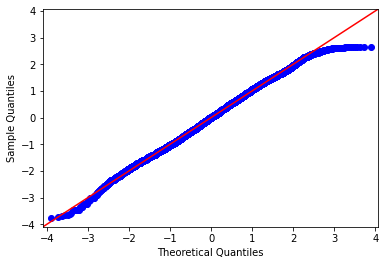

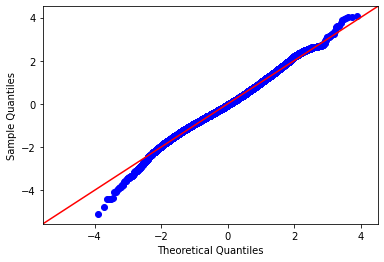

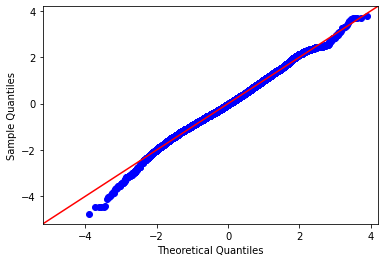

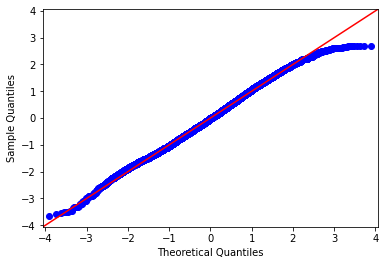

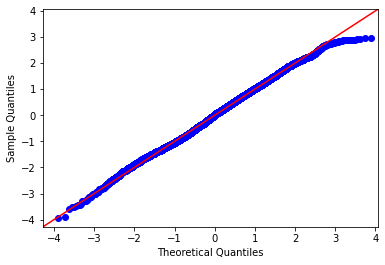

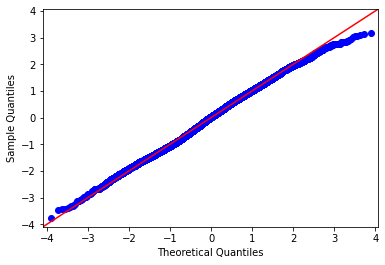

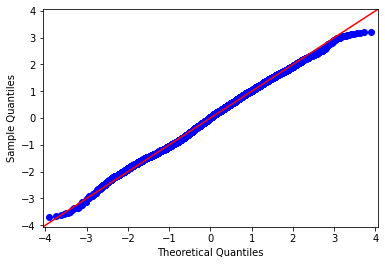

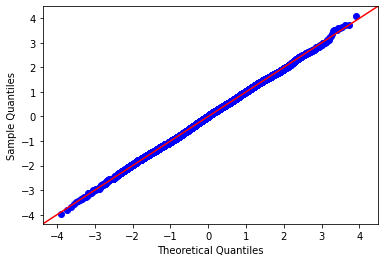

In [1145]:
for col in ['view','quadrant','nrth_sth','basement','multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin']:
    df_cat_mod2 = pd.get_dummies(df_log_strong[col].astype('category'), drop_first=True, prefix=col)
    df_cat_mod2 = pd.concat([df_log_strong['log_price'], df_cat_mod2], axis=1)
    f = 'log_price' + '~' +  '+'.join(list(df_cat_mod2.columns[1:]))
    print(col.upper())
    cat_model2 = ols(formula=f, data=df_cat_mod2).fit()
    display(cat_model2.summary())

\> 1.45e6 : GRADE_BIN: r_2=.410/JB=10.748/skew=-0.008/kurt=2.890/F-stat=4826

<hr style="border:1px solid gray"> </hr>

## Model 1 (Initial/Baseline)
- Feature Select
- Build and tune the model(s)
- Evaluate if results are promising
- Tune if evaluation shows promise

#### Feature Select

In [995]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'view', 'Nrth_Sth', 'basement',
       'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin', 'sector'],
      dtype='object')

#### M1 categorical variables: one hot encode
- Leaving out grades and bedrooms since we binned these categorical variables

In [996]:
df_m1_cats = df_log_strong[['view', 'basement', 'multilevel',
       'bedrooms_bin', 'bathrooms_bin', 'grade_bin']].astype('category')
df_m1_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   view           20836 non-null  category
 1   basement       20836 non-null  category
 2   multilevel     20836 non-null  category
 3   bedrooms_bin   20836 non-null  category
 4   bathrooms_bin  20836 non-null  category
 5   grade_bin      20836 non-null  category
dtypes: category(6)
memory usage: 285.6 KB


In [997]:
df_m1_cats = pd.get_dummies(df_m1_cats, drop_first = True)
df_m1_cats.head()

,view_1,basement_1,multilevel_1,bedrooms_bin_four,bedrooms_bin_one_two,bedrooms_bin_three,bathrooms_bin_many,bathrooms_bin_two_two_point_five,grade_bin_below_average,grade_bin_good,grade_bin_great
0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,0,1,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0


#### Model 1 continuous variables
- Don't transform for this initial model

In [998]:
df_m1_conts = df_log_strong[['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15',]]
df_m1_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_price          20836 non-null  float64
 1   log_bedrooms       20836 non-null  float64
 2   log_bathrooms      20836 non-null  float64
 3   log_sqft_living    20836 non-null  float64
 4   log_grade          20836 non-null  float64
 5   log_sqft_living15  20836 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [999]:
df_m1 = pd.concat([df_m1_conts, df_m1_cats], axis = 1)
display(df_m1.head())

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_grade,log_sqft_living15,view_1,basement_1,multilevel_1,bedrooms_bin_four,bedrooms_bin_one_two,bedrooms_bin_three,bathrooms_bin_many,bathrooms_bin_two_two_point_five,grade_bin_below_average,grade_bin_good,grade_bin_great
0,12.309982,1.098612,0.000000,7.073270,1.945910,7.200425,0,0,0,0,0,1,0,0,0,0,0
1,13.195614,1.098612,0.810930,7.851661,1.945910,7.432484,0,1,1,0,0,1,0,1,0,0,0
2,12.100712,0.693147,0.000000,6.646391,1.791759,7.908387,0,0,0,0,1,0,0,0,1,0,0
3,13.311329,1.386294,1.098612,7.580700,1.945910,7.215240,0,1,0,1,0,0,1,0,0,0,0
4,13.142166,1.098612,0.693147,7.426549,2.079442,7.495542,0,0,0,0,0,1,0,0,0,1,0


Rename the columns for the formula, so they don't contain numbers.

In [1000]:
df_m1.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'view_1', 'basement_1',
       'multilevel_1', 'bedrooms_bin_four', 'bedrooms_bin_one_two',
       'bedrooms_bin_three', 'bathrooms_bin_many',
       'bathrooms_bin_two_two_point_five', 'grade_bin_below_average',
       'grade_bin_good', 'grade_bin_great'],
      dtype='object')

In [1001]:
df_m1.columns[1:]

Index(['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_grade',
       'log_sqft_living15', 'view_1', 'basement_1', 'multilevel_1',
       'bedrooms_bin_four', 'bedrooms_bin_one_two', 'bedrooms_bin_three',
       'bathrooms_bin_many', 'bathrooms_bin_two_two_point_five',
       'grade_bin_below_average', 'grade_bin_good', 'grade_bin_great'],
      dtype='object')

In [1002]:
df_y = df_m1['log_price'].to_frame()
X1_cols = df_m1.columns[1:]

#### Fit the model

In [1003]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.formula.api as smf

In [1004]:
X1 = '+'.join(list(X1_cols))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model1 = ols(formula= f, data=df_m1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1490.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:20:09   Log-Likelihood:                -5862.9
No. Observations:               20836   AIC:                         1.176e+04
Df Residuals:                   20819   BIC:                         1.189e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2406      0.147     49.220      0.000       6.952       7.529
log_bedrooms                        -0.0044      0.033     -0.136      0.892      -0.068       0.059
log_bathrooms                       -0.0462      0.013     -3.663      0.000      -0.071      -0.021
log_sqft_living                      0.3022      0.012     24.434      0.000       0.278       0.326
log_grade                            0.9132      0.065     14.148      0.000       0.787       1.040
log_sqft_living15                    0.2084      0.011     18.616      0.000       0.186       0.230
view_1                               0.1641      0.008     19.777      0.000       0.148       0.180
basement_1                           0.1337      0.005     25.008      0.000       0.123       0.144
multilevel_1                         0.1032      0.006     18.127      0.000       0.092       0.114
bedrooms_bin_four                   -0.0157      0.012     -1.285      0.199      -0.040       0.008
bedrooms_bin_one_two                 0.0973      0.034      2.875      0.004       0.031       0.164
bedrooms_bin_three                  -0.0156      0.020     -0.787      0.431      -0.055       0.023
bathrooms_bin_many                  -0.0068      0.011     -0.607      0.544      -0.029       0.015
bathrooms_bin_two_two_point_five    -0.0935      0.008    -11.736      0.000      -0.109      -0.078
grade_bin_below_average             -0.0265      0.014     -1.918      0.055      -0.053       0.001
grade_bin_good                       0.0555      0.010      5.408      0.000       0.035       0.076
grade_bin_great                      0.1390      0.020      7.012      0.000       0.100       0.178
==============================================================================
Omnibus:                       23.259   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.757
Skew:                          -0.051   Prob(JB):                     1.89e-05
Kurtosis:                       2.880   Cond. No.                         777.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for multicollinearity
- Check VIF scores

In [966]:
X1_cols.values

array(['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_grade',
       'log_sqft_living15', 'view_1', 'basement_1', 'multilevel_1',
       'bedrooms_bin_four', 'bedrooms_bin_one_two', 'bedrooms_bin_three',
       'bathrooms_bin_many', 'bathrooms_bin_two_two_point_five',
       'Nrth_Sth_S', 'grade_bin_below_average', 'grade_bin_good',
       'grade_bin_great'], dtype=object)

In [967]:
vif_scores = [variance_inflation_factor(df_m1[X1_cols].values, i) for i in range(df_m1[X1_cols].shape[1])]
list(zip(X1_cols, vif_scores))

[('log_bedrooms', 290.4925397271793),
 ('log_bathrooms', 18.60484593088037),
 ('log_sqft_living', 1688.768220919721),
 ('log_grade', 1745.1289290415066),
 ('log_sqft_living15', 1321.5476154730889),
 ('view_1', 1.195264305176439),
 ('basement_1', 2.2886553358896213),
 ('multilevel_1', 3.3285526189391716),
 ('bedrooms_bin_four', 9.055891263470311),
 ('bedrooms_bin_one_two', 29.14736942976421),
 ('bedrooms_bin_three', 33.35902500532599),
 ('bathrooms_bin_many', 4.012031308906041),
 ('bathrooms_bin_two_two_point_five', 4.503302444186703),
 ('Nrth_Sth_S', 1.6121088361941998),
 ('grade_bin_below_average', 2.435518610172337),
 ('grade_bin_good', 3.527067557991208),
 ('grade_bin_great', 5.850440490311751)]

#### Checking for linearity
- Scatter matrix
- Joint plot

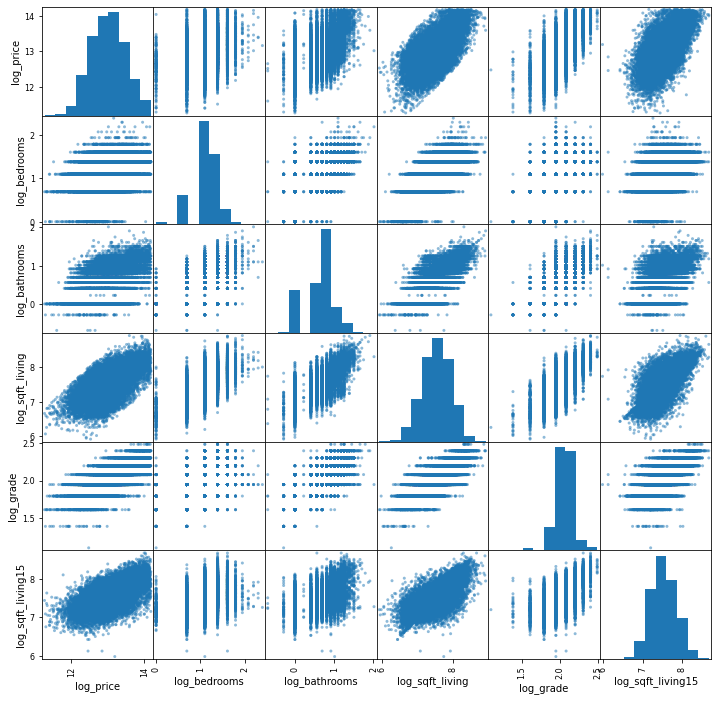

In [968]:
pd.plotting.scatter_matrix(df_m1_conts, figsize=(12,12), diagonal='hist'); # diagonal='kde' to view kde

#### Checking for normality
- QQ-Plot
- JB Test

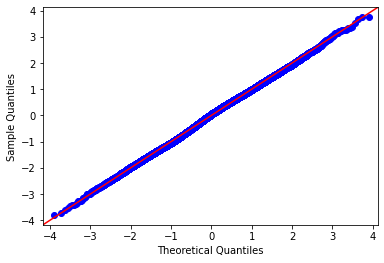

In [1005]:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

In [849]:
model1.predict(df_m1[X1_cols])

0        12.851532
1        13.203204
2        12.766286
3        13.063996
4        13.093568
           ...    
21412    13.076117
21413    13.280010
21414    12.794398
21415    12.989566
21416    12.794398
Length: 20836, dtype: float64

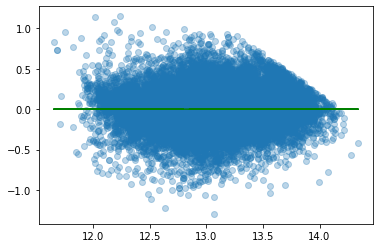

In [850]:
plt.scatter(model1.predict(df_m1[X1_cols]), model1.resid, alpha = .3)
plt.plot(model1.predict(df_m1[X1_cols]), [0 for i in range(len(df_m1[X1_cols]))], c='g')


In [ ]:
lwr_thresh = df_y.log_price.quantile(q=.45)
upr_thresh = df_y.log_price.quantile(q=.55)
middle_10percent_indices = df_y[(df_y.log_price >= lwr_thresh) & (df_y.log_price <=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in df_y.index if x not in middle_10percent_indices]
plt.scatter(df_y.log_price.iloc[indices], model1.resid.iloc[indices])
plt.xlabel('log_price')
plt.ylabel('Model Residuals')
plt.title("Residuals versus log_price")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [684]:
middle_10percent_indices = df_y[(df_y.log_price >= lwr_thresh) & (df_y.log_price <=upr_thresh)].index
indices = [x-1 for x in df_y.index if x not in middle_10percent_indices]

In [ ]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model1.resid.iloc[indices], model1.model.exog[indices])
list(zip(name, test))

<hr style="border:1px solid gray"> </hr>

## Model 2
- Feature Select
- Build and tune the model(s)
- Evaluate if results are promising
- Tune if evaluation shows promise

#### Feature Select

In [686]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'view', 'basement', 'multilevel',
       'bedrooms_bin', 'bathrooms_bin', 'grade_bin'],
      dtype='object')

#### M2 categorical variables: one hot encode
- Leaving out grades and bedrooms since we binned these categorical variables

In [970]:
df_m2_cats = df_log_strong[['view','Nrth_Sth','basement', 'multilevel']].astype('category')
df_m2_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   view        20836 non-null  category
 1   Nrth_Sth    20836 non-null  category
 2   basement    20836 non-null  category
 3   multilevel  20836 non-null  category
dtypes: category(4)
memory usage: 244.5 KB


In [971]:
df_m2_cats = pd.get_dummies(df_m2_cats, drop_first = True)
df_m2_cats.head()

,view_1,Nrth_Sth_S,basement_1,multilevel_1
0,0,0,0,0
1,0,0,1,1
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0


#### M2 continuous variables

In [972]:
df_m2_conts = df_log_strong[['log_price', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15',]]
df_m2_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_price          20836 non-null  float64
 1   log_bathrooms      20836 non-null  float64
 2   log_sqft_living    20836 non-null  float64
 3   log_grade          20836 non-null  float64
 4   log_sqft_living15  20836 non-null  float64
dtypes: float64(5)
memory usage: 976.7 KB


In [973]:
df_m2 = pd.concat([df_m2_conts, df_m2_cats], axis = 1)
display(df_m2.head())

,log_price,log_bathrooms,log_sqft_living,log_grade,log_sqft_living15,view_1,Nrth_Sth_S,basement_1,multilevel_1
0,12.309982,0.000000,7.073270,1.945910,7.200425,0,0,0,0
1,13.195614,0.810930,7.851661,1.945910,7.432484,0,0,1,1
2,12.100712,0.000000,6.646391,1.791759,7.908387,0,0,0,0
3,13.311329,1.098612,7.580700,1.945910,7.215240,0,0,1,0
4,13.142166,0.693147,7.426549,2.079442,7.495542,0,0,0,0


Rename the columns for the formula, so they don't contain numbers.

In [974]:
df_m2.columns

Index(['log_price', 'log_bathrooms', 'log_sqft_living', 'log_grade',
       'log_sqft_living15', 'view_1', 'Nrth_Sth_S', 'basement_1',
       'multilevel_1'],
      dtype='object')

In [975]:
df_m2.columns[1:]

Index(['log_bathrooms', 'log_sqft_living', 'log_grade', 'log_sqft_living15',
       'view_1', 'Nrth_Sth_S', 'basement_1', 'multilevel_1'],
      dtype='object')

In [976]:
df_y = df_m2['log_price'].to_frame()
X2_cols = df_m2.columns[1:]

#### Fit the model

In [977]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.formula.api as smf

In [978]:
X2 = '+'.join(list(X2_cols))
y = list(df_y.columns)[0]
f2 = str(y) + '~' + X2

model1 = ols(formula= f2, data=df_m2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     6724.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:52:15   Log-Likelihood:                -517.58
No. Observations:               20836   AIC:                             1053.
Df Residuals:                   20827   BIC:                             1125.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.1793      0.053    135.534      0.000       7.075       7.283
log_bathrooms        -0.0448      0.007     -6.258      0.000      -0.059      -0.031
log_sqft_living       0.3794      0.008     44.678      0.000       0.363       0.396
log_grade             0.8369      0.019     43.219      0.000       0.799       0.875
log_sqft_living15     0.1891      0.009     22.232      0.000       0.172       0.206
view_1                0.1849      0.006     29.042      0.000       0.172       0.197
Nrth_Sth_S           -0.4746      0.004   -122.773      0.000      -0.482      -0.467
basement_1            0.0300      0.004      7.174      0.000       0.022       0.038
multilevel_1          0.0325      0.004      7.529      0.000       0.024       0.041
==============================================================================
Omnibus:                      404.700   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.532
Skew:                           0.100   Prob(JB):                    8.90e-175
Kurtosis:                       3.940   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for multicollinearity
- Check VIF scores

In [979]:
X2_cols.values

array(['log_bathrooms', 'log_sqft_living', 'log_grade',
       'log_sqft_living15', 'view_1', 'Nrth_Sth_S', 'basement_1',
       'multilevel_1'], dtype=object)

In [980]:
vif_scores = [variance_inflation_factor(df_m2[X2_cols].values, i)
              for i in range(df_m2[X2_cols].shape[1])]
list(zip(X2_cols, vif_scores))

[('log_bathrooms', 7.0536854313206465),
 ('log_sqft_living', 1195.283969059353),
 ('log_grade', 516.4660998522738),
 ('log_sqft_living15', 1095.813226715611),
 ('view_1', 1.140841379726587),
 ('Nrth_Sth_S', 1.5786379444808858),
 ('basement_1', 2.2379952350598935),
 ('multilevel_1', 3.1135734481313015)]

#### Checking for linearity
- Scatter matrix
- Joint plot

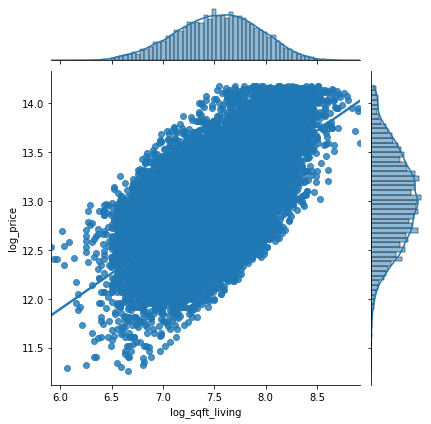

In [655]:
sns.jointplot(x= df_m1['log_sqft_living'], y= df_m1['log_price'], data= df_m1, kind='reg')

#### Checking for normality
- QQ-Plot
- JB Test

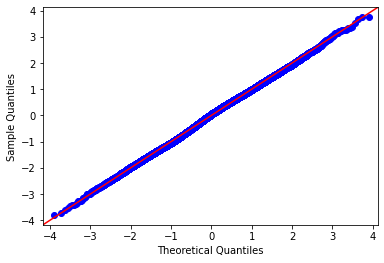

In [656]:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

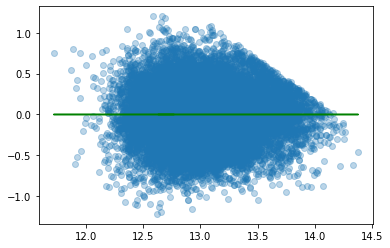

In [658]:
plt.scatter(model2.predict(df_m2[X2_cols]), model2.resid, alpha = .3)
plt.plot(model2.predict(df_m2[X2_cols]), [0 for i in range(len(df_m2[X2_cols]))], c='g')


<hr style="border:1px solid gray"> </hr>

## Model 3
- Feature Select
- Build and tune the model(s)
- Evaluate if results are promising
- Tune if evaluation shows promise

#### Feature Select

In [981]:
df_log_strong.columns

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_grade', 'log_sqft_living15', 'view', 'Nrth_Sth', 'basement',
       'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin', 'sector'],
      dtype='object')

#### M2 categorical variables: one hot encode
- Leaving out grades and bedrooms since we binned these categorical variables

In [1071]:
df_m3_cats = df_log_strong[[]].astype('category')
df_m3_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Empty DataFrame

In [1073]:
# df_m3_cats = pd.get_dummies(df_m3_cats, drop_first = True)
# df_m3_cats.head()

#### M2 continuous variables

In [1074]:
df_m3_conts = df_log_strong[['log_price','log_grade', 'log_sqft_living15']]
df_m3_conts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20836 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_price          20836 non-null  float64
 1   log_grade          20836 non-null  float64
 2   log_sqft_living15  20836 non-null  float64
dtypes: float64(3)
memory usage: 651.1 KB


In [1075]:
df_m3 = pd.concat([df_m3_conts, df_m3_cats], axis = 1)
display(df_m3.head())

,log_price,log_grade,log_sqft_living15
0,12.309982,1.945910,7.200425
1,13.195614,1.945910,7.432484
2,12.100712,1.791759,7.908387
3,13.311329,1.945910,7.215240
4,13.142166,2.079442,7.495542


Rename the columns for the formula, so they don't contain numbers.

In [1076]:
df_m3.columns

Index(['log_price', 'log_grade', 'log_sqft_living15'], dtype='object')

In [1077]:
df_m3.columns[1:]

Index(['log_grade', 'log_sqft_living15'], dtype='object')

In [1078]:
df_y = df_m3['log_price'].to_frame()
X3_cols = df_m3.columns[1:]

#### Fit the model

In [1079]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.formula.api as smf

In [1080]:
X3 = '+'.join(list(X3_cols))
y = list(df_y.columns)[0]
f3 = str(y) + '~' + X3

model1 = ols(formula= f3, data=df_m3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     8742.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:44:06   Log-Likelihood:                -7463.9
No. Observations:               20836   AIC:                         1.493e+04
Df Residuals:                   20833   BIC:                         1.496e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9598      0.057    121.686      0.000       6.848       7.072
log_grade             1.6029      0.023     71.021      0.000       1.559       1.647
log_sqft_living15     0.3747      0.010     37.262      0.000       0.355       0.394
==============================================================================
Omnibus:                       42.071   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.305
Skew:                           0.008   Prob(JB):                     3.56e-08
Kurtosis:                       2.802   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking for multicollinearity
- Check VIF scores

In [1042]:
X3_cols.values

array(['log_grade', 'log_sqft_living15', 'Nrth_Sth_S'], dtype=object)

In [1043]:
vif_scores = [variance_inflation_factor(df_m3[X3_cols].values, i)
              for i in range(df_m3[X3_cols].shape[1])]
list(zip(X3_cols, vif_scores))

[('log_grade', 368.6576046145149),
 ('log_sqft_living15', 373.1243443011124),
 ('Nrth_Sth_S', 1.4862643050164006)]

#### Checking for linearity
- Scatter matrix
- Joint plot

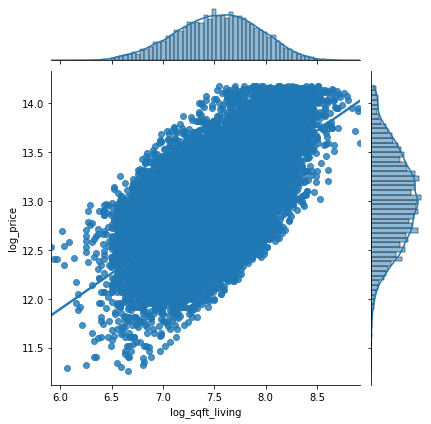

In [655]:
sns.jointplot(x= df_m3['log_sqft_living'], y= df_m3['log_price'], data= df_m3, kind='reg')

#### Checking for normality
- QQ-Plot
- JB Test

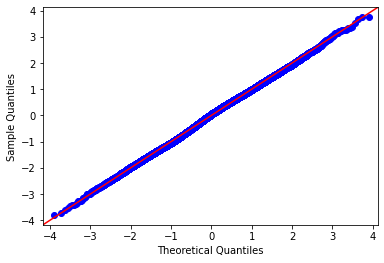

In [656]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

#### Checking for homoscedasticity
- scatterplot
- GQ Test

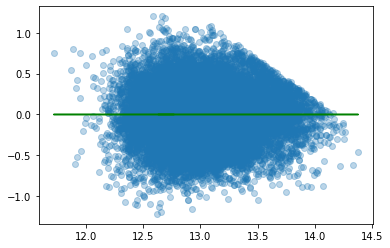

In [658]:
plt.scatter(model3.predict(df_m3[X3_cols]), model3.resid, alpha = .3)
plt.plot(model3.predict(df_m3[X3_cols]), [0 for i in range(len(df_m3[X3_cols]))], c='g')


<hr style="border:1px solid gray"> </hr>

## Interpret Results
- Interpret results of the model(s)
- Communicate results to the stakeholders
- Identify next steps

#### Conclusion

#### Next Steps

#### Notes and extra code
In the log-log- model, see that

𝛽1=∂log(𝑦)∂log(𝑥).

Recall that

∂log(𝑦)∂𝑦=1𝑦

or

∂log(𝑦)=∂𝑦𝑦.

Multiplying this latter formulation by 100 gives the percent change in 𝑦. We have analogous results for 𝑥.

Using this fact, we can interpret 𝛽1 as the percent change in 𝑦 for a 1 percent change in 𝑥.

Following the same logic, for the level-log model, we have

𝛽1=∂𝑦∂log(𝑥)=100∂𝑦100×∂log(𝑥).

or 𝛽1/100 is the unit change in 𝑦 for a one percent change in 𝑥.

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df)
plt.title('Lat vs Long, Price with Color')

In [ ]:
df['sector_1'] = df.iloc[(df.lat > 47) & (df.long < )]
df['sector_2'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_3'] = df.iloc[(df.lat > 122) & (df.long < )]
df['sector_4'] = df.iloc[(df.lat > 122) & (df.long < )]


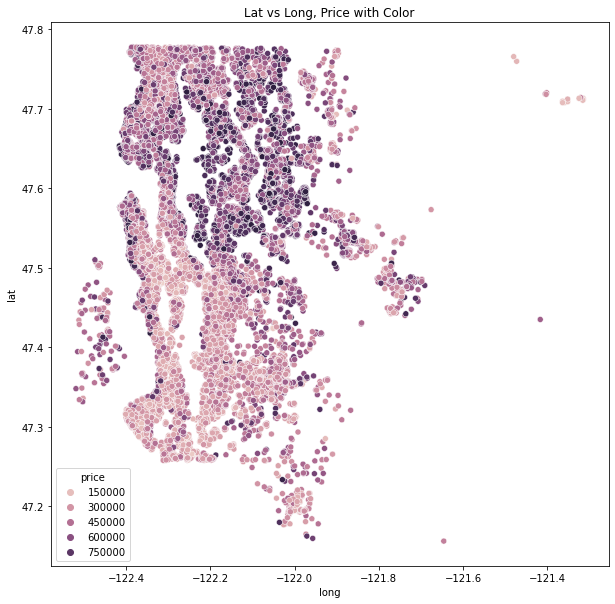

In [223]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df_no_y_outlrs, cmap='coolwarm')
plt.title('Lat vs Long, Price with Color');

#### Student

In [ ]:
zipcodes = pd.get_dummies(df['zipcode'], prefix = 'zipcode')
zipcodes

In [ ]:
df_with_zip = pd.concat([df, zipcodes], axis = 1)

In [ ]:
df_with_zip.info()

In [ ]:
df.loc[(df.lat > 47.5) & (df.long > -122.2), "sector_1"] = 1
df.info()

In [ ]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = "long", y = "lat", hue = "sector_1" , data=df)

#### Folium

In [11]:
df.lat.min()

In [ ]:
# !pip install folium

In [ ]:
import folium


In [ ]:
kc_coordinates = (47.54, -121.98)


In [ ]:
kc_map = folium.Map(location = kc_coordinates)


In [ ]:
kc_map


In [ ]:
# manipulate df
df.groupby(['zipcode']).median()[['lat', 'long', 'price']].values.tolist()

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(data = df.groupby(['zipcode']).median()[['lat', 'long', 'price']].values.tolist()).add_to(kc_map)


In [ ]:
display(kc_map)


#### Plotly

In [ ]:
# !pip install plotly


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x = "bedrooms", y = "price")
fig.show()

In [ ]:
px.box(df, x = "grade", y = "price")

In [ ]:
px.scatter(df, x = "sqft_living", y = "price", trendline= "ols")

In [ ]:
def standardize(feature):
    return (feature-feature.mean())/feature.std()

stand_cont_df = df[cont]
stand_cont_df.drop(columns = ['sqft_basement','date', 'index', 'yr_renovated'], inplace=True)
cont_log = np.log(stand_cont_df)
kc_standardized = cont_log.apply(standardize)
kc_standardized.hist(figsize=(12,10))